## Craniotomy/Craniectomy

In [2]:
from pycaret.classification import *
import pandas as pd

In [3]:
# Read the file in
data = pd.read_csv("chart_cranio.csv")
data = data.iloc[:, 1:]

In [4]:
full_data = pd.read_csv("imputed6.csv")
full_data = full_data.iloc[:, 1:]

In [5]:
# List of covariates
covariates = ["age.at.admit", "gcs.initial", "wbc",
              "platelet", "hematocrit", "glucose",
              "creatinine", "sodium", "potassium",
              "diabetes", "anemia", "liver.disease",
              "depressive.disorder", "intraparenchymal",
              "died.before.90.days"]

In [10]:
# Only set data to hold these covariates
control = data[covariates]
full_data = full_data[covariates]

In [12]:
s = setup(data=control, target='died.before.90.days', session_id=125)
results = compare_models()

,Description,Value
0,Session id,125
1,Target,died.before.90.days
2,Target type,Binary
3,Original data shape,"(153, 15)"
4,Transformed data shape,"(153, 15)"
5,Transformed train set shape,"(107, 15)"
6,Transformed test set shape,"(46, 15)"
7,Numeric features,9
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8891,0.7194,0.3500,0.5000,0.4000,0.3724,0.3863,0.0440
et,Extra Trees Classifier,0.8709,0.7667,0.2500,0.4000,0.3000,0.2724,0.2863,0.0610
ridge,Ridge Classifier,0.8700,0.6722,0.2000,0.4000,0.2667,0.2345,0.2534,0.0100
gbc,Gradient Boosting Classifier,0.8527,0.7222,0.3500,0.4500,0.3833,0.3213,0.3293,0.0390
lr,Logistic Regression,0.8509,0.6500,0.2000,0.3500,0.2500,0.2002,0.2141,0.3510
dt,Decision Tree Classifier,0.8436,0.7056,0.5000,0.5333,0.4933,0.4064,0.4183,0.0070
dummy,Dummy Classifier,0.8427,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0110
ada,Ada Boost Classifier,0.8418,0.7306,0.3500,0.3333,0.3233,0.2553,0.2664,0.0340
lda,Linear Discriminant Analysis,0.8418,0.6722,0.2000,0.3500,0.2500,0.1918,0.2068,0.0120
knn,K Neighbors Classifier,0.8336,0.6722,0.0500,0.1000,0.0667,0.0345,0.0373,0.2850


In [14]:
et_model = create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7273,0.7778,0.0000,0.0000,0.0000,-0.1379,-0.1491
1,0.9091,0.9444,0.5000,1.0000,0.6667,0.6207,0.6708
2,0.8182,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.8182,0.3056,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.9091,1.0000,0.5000,1.0000,0.6667,0.6207,0.6708
5,0.9091,0.8333,0.5000,1.0000,0.6667,0.6207,0.6708
6,0.8182,0.6944,0.0000,0.0000,0.0000,0.0000,0.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,0.9000,0.4444,0.0000,0.0000,0.0000,0.0000,0.0000


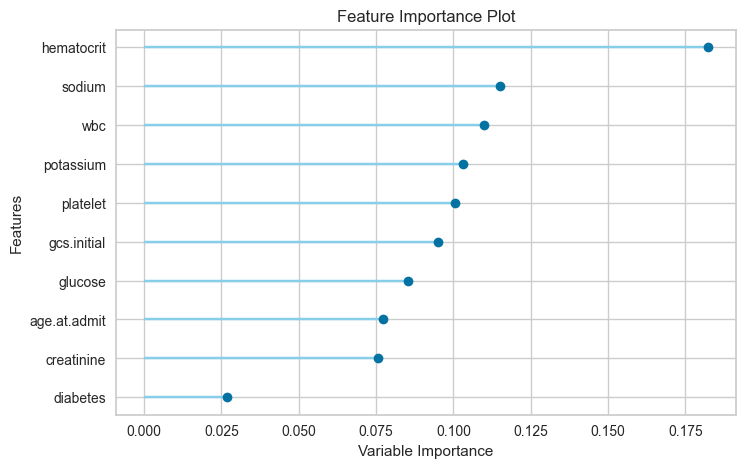

In [16]:
plot_model(et_model, plot = 'feature')

In [18]:
# Predicting Values
predicted_values = predict_model(et_model, data=full_data)
predicted_values = predicted_values["prediction_score"]

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.6430,0.6669,0.1363,0.6476,0.2252,0.1070,0.1623


In [20]:
# Write to CSV
predicted_values.to_csv('cranio_predict_probs_reg.csv')